In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import deepmatcher as dm
from utils.intermediate_layer_extraction import return_layer_input
from utils.ri_calculator import computeRi
from utils.distance_measures import nearestNeighborOnAttributes
from utils.distance_measures import smallestDistanceOnAttributes
import pandas as pd
import torch

In [4]:
DATASET_DIR = '../../datasets/Structured/itunes-amazon/'
augmented_test = pd.read_csv(DATASET_DIR+'augmented_test.csv')

In [5]:
augmented_test[augmented_test.label==0].to_csv(DATASET_DIR+'augmentedtest_negatives.csv',index=False)

## Retrain model 1

In [6]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']

In [9]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('../../models/itunesamazon_impr1.pth')
hybrid_model = hybrid_model.to('cuda')

In [11]:
testneg = return_layer_input(hybrid_model,hybrid_model.classifier,
                             '../../datasets/Structured/itunes-amazon/','test_negatives',0)

In [12]:
testpos = return_layer_input(hybrid_model,hybrid_model.classifier,
                               '../../datasets/Structured/itunes-amazon/','test_positives',1)

In [13]:
negatives_ri,neg_rinorms_df= computeRi(hybrid_model.classifier,
                                                    attributes,testneg,0,aggregation_type='cosine')

100%|██████████| 79/79 [00:25<00:00,  3.14it/s]


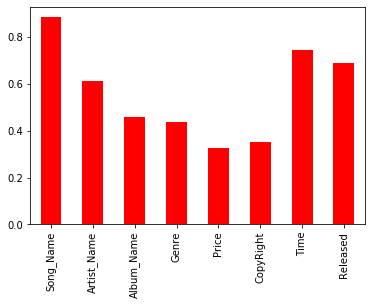

In [15]:
neg_rinorms_df.drop(['sample_id'],axis=1).mean().plot.bar(color='red')

In [16]:
pos_ri_hybrid,pos_rinorms_df = computeRi(hybrid_model.classifier,attributes,
                                              testpos,1,aggregation_type='cosine')

100%|██████████| 23/23 [00:06<00:00,  3.63it/s]


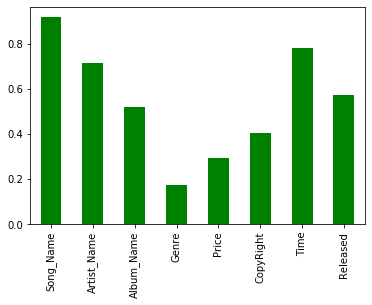

In [17]:
pos_rinorms_df.drop(['sample_id'],axis=1).mean().plot.bar(color='green')

## Retrained model 2

In [19]:
improved2 = dm.MatchingModel(attr_summarizer='hybrid')
improved2.load_state('../../models/itunesamazon_impr2.pth')
improved2 = improved2.to('cuda')

In [20]:
testneg2 = return_layer_input(improved2,improved2.classifier,
                             '../../datasets/Structured/itunes-amazon/','test_negatives',0)

In [21]:
testpos2 = return_layer_input(improved2,improved2.classifier,
                               '../../datasets/Structured/itunes-amazon/','test_positives',1)

In [23]:
negatives_ri2,neg_rinorms_df2 = computeRi(improved2.classifier,
                                                    attributes,testneg2,0,aggregation_type='cosine')


100%|██████████| 77/77 [00:31<00:00,  2.46it/s]


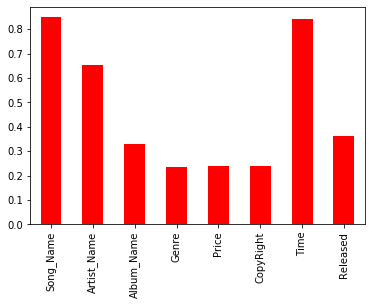

In [24]:
neg_rinorms_df2.drop(['sample_id'],axis=1).mean().plot.bar(color='red')

In [45]:
pos_ri_hybrid2,pos_rinorms_df2 = computeRi(improved2.classifier,attributes,
                                              testpos2,1)


100%|██████████| 27/27 [00:06<00:00,  4.29it/s]


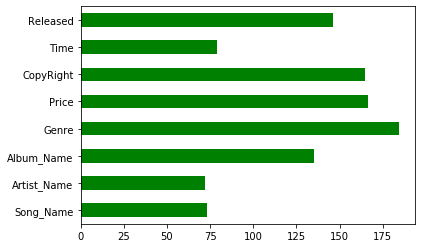

In [46]:
pos_rinorms_df2.drop(['sample_id'],axis=1).sum().plot.barh(color='green')

## Model retrained with another tecnique

In [25]:
improved3 = dm.MatchingModel(attr_summarizer='hybrid')
improved3.load_state('../../models/itunes_amazon_impr3.pth')
improved3 = improved3.to('cuda')

In [26]:
testneg3 = return_layer_input(improved3,improved3.classifier,
                             '../../datasets/Structured/itunes-amazon/','test_negatives',0)

In [32]:
testpos3 = return_layer_input(improved3,improved3.classifier,
                             '../../datasets/Structured/itunes-amazon/','test_positives',1)

In [28]:
negatives_ri3,neg_ri_agg3 = computeRi(improved3.classifier,
                                                    attributes,testneg3,0,aggregation_type='cosine')


100%|██████████| 73/73 [00:16<00:00,  4.31it/s]


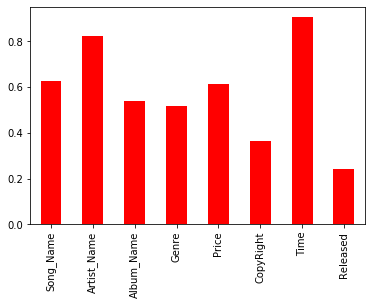

In [29]:
neg_ri_agg3.drop(['sample_id'],axis=1).mean().plot.bar(color='red')

In [33]:
positives_ri3,pos_ri_agg3 = computeRi(improved3.classifier,
                                                    attributes,testpos3,1,aggregation_type='cosine')


100%|██████████| 25/25 [00:07<00:00,  3.22it/s]


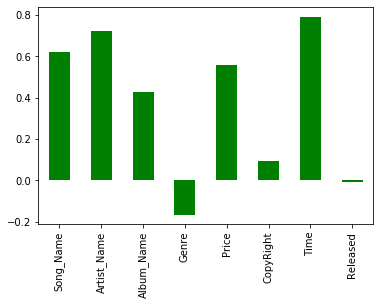

In [36]:
pos_ri_agg3.drop(['sample_id'],axis=1).mean().plot.bar(color='green')